# Random Forest Voxel-Wise Classification

In [1]:
from sklearn.ensemble import RandomForestClassifier
from HW8functions import Subject, HCPData, ModeKeys, Evaluator
import numpy as np
import pickle

## The Features
The features for randomforest will be 
* the t1 intensity at the pixel
* the edge image intensity at the pixel
* the mean value of the intensity image within radius 4
* the mean value of the edge image within radius 4

In [2]:
dataset = HCPData()

In [3]:
subs = dataset.get_subjects(ModeKeys.TRAIN)
features = np.empty((0,4))
labels = np.empty((0,1))
for sub in subs[:200][::20]:
    feats, lbls = dataset.extract_engineered_features(sub, train=True)
    features = np.vstack((features, feats[::3, :])) # only take every third sample
    labels = np.vstack((labels, lbls[::3, :])) # only take every third sample
    print(features.shape)

    
del feats
del lbls

(2804208, 4)
(5313968, 4)
(8227302, 4)
(10971846, 4)
(13747729, 4)
(16418833, 4)
(19194716, 4)
(22042748, 4)
(24630380, 4)
(27241100, 4)


In [4]:
labels = labels.ravel()

## The Shapes

In [5]:
print(features.shape, labels.shape)

(27241100, 4) (27241100,)


In [6]:
clf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    verbose=2,
)

## Train the model

In [7]:
clf.fit(features, labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 3 of 100building tree 4 of 100building tree 5 of 100building tree 6 of 100building tree 2 of 100building tree 7 of 100building tree 8 of 100building tree 1 of 100building tree 9 of 100building tree 10 of 100building tree 11 of 100building tree 12 of 100











building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 20 of 100building tree 19 of 100

building tree 21 of 100
building tree 22 of 100
building tree 23 of 100building tree 24 of 100

building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

## The Validation
I chose to validate on only 5 dataset because it was faster, and I'm not going to see alot of variance at the voxel level

In [8]:
subs = dataset.get_subjects(ModeKeys.TEST)
features = np.empty((0,4))
labels = np.empty((0,1))
print(features.shape, labels.shape)
for sub in subs[:5]:
    feats, lbls = dataset.extract_engineered_features(sub, train=True)
    print(feats.shape, lbls.shape)
    features = np.vstack((features, feats[:, :])) # only take every fifth sample
    labels = np.vstack((labels, lbls[:, :])) # only take every fifth sample
    print(features.shape)
    print(labels.shape)
    assert(len(features) == len(labels))
    

(0, 4) (0, 1)
(8006208, 4) (8006208, 1)
(8006208, 4)
(8006208, 1)
(7074432, 4) (7074432, 1)
(15080640, 4)
(15080640, 1)
(7871520, 4) (7871520, 1)
(22952160, 4)
(22952160, 1)
(7116928, 4) (7116928, 1)
(30069088, 4)
(30069088, 1)
(8426880, 4) (8426880, 1)
(38495968, 4)
(38495968, 1)


In [9]:
prediction = clf.predict(features)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   16.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  1.2min finished


In [10]:
prediction = np.round(prediction).astype(np.uint8)
labels = labels.astype(np.uint8)

## sklearn classification report
Note the poor recall on CSF tissues

In [11]:
print(Evaluator.classification_report(labels, prediction))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94  30862612
           1       0.70      0.61      0.65   3879387
           2       0.78      0.80      0.79   2356712
           3       0.58      0.20      0.29   1397257

   micro avg       0.89      0.89      0.89  38495968
   macro avg       0.75      0.64      0.67  38495968
weighted avg       0.88      0.89      0.88  38495968



## sklearn confusion matrix
we can now see that our algorithm is confusing the background with csf, because both of them are very dark in these t1 images 

Normalized confusion matrix
[[9.62985246e-01 2.28690624e-02 8.38328266e-03 5.76240922e-03]
 [3.08065682e-01 6.14428517e-01 7.30924757e-02 4.41332613e-03]
 [9.13314822e-02 1.12588640e-01 7.96079029e-01 8.48639970e-07]
 [7.60451370e-01 4.32325621e-02 6.94217313e-05 1.96246646e-01]]


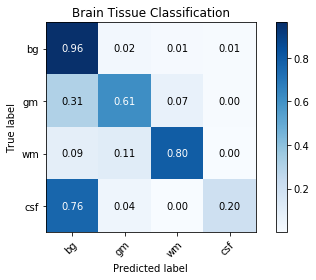

In [12]:
%matplotlib inline
Evaluator.plot_confusion_matrix(labels.ravel(), prediction, np.array(['bg','gm','wm','csf']), normalize=True, title="Brain Tissue Classification")

## pickle the model for later use

In [13]:
with open('RF.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [14]:
print("DONE")

DONE
